# You've Got a FRED

In [2]:
import pandas as pd
import datetime
from pathlib import Path
%matplotlib inline


Bad key savefig.frameon in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

## Hodrick-Prescott filter analysis

### GDP Analysis

In [3]:
# Read the GDP csv data from FRED and set the column `DATE` as a datetime index
file_path = Path("../Resources/gdp_data.csv")
gdp = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
gdp.head()

,GDP
DATE,
2004-01-01,11920.169
2004-04-01,12108.987
2004-07-01,12303.340
2004-10-01,12522.425
2005-01-01,12761.337


<AxesSubplot:xlabel='DATE'>

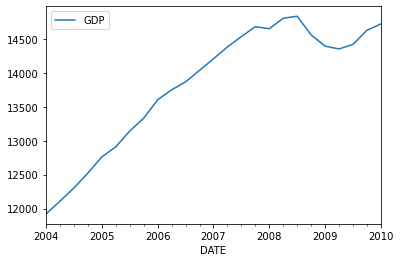

In [4]:
gdp.plot()

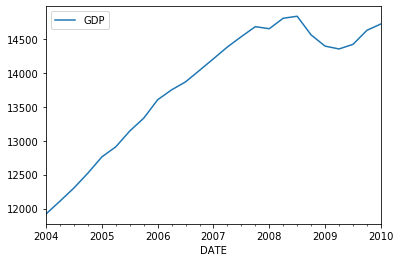

In [3]:
# Plot the raw GDP data as a line plot


In [5]:
# Use the `hpfilter` function to decompose the GDP column into the trend and noise components.
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(gdp['GDP'])

<AxesSubplot:xlabel='DATE'>

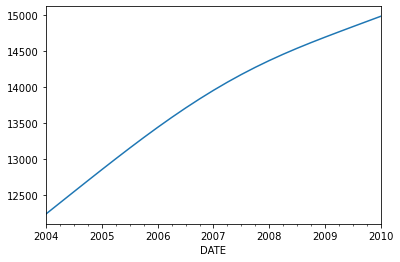

In [6]:
# Plot the GDP trend data as a line plot
ts_trend.plot()

<AxesSubplot:xlabel='DATE'>

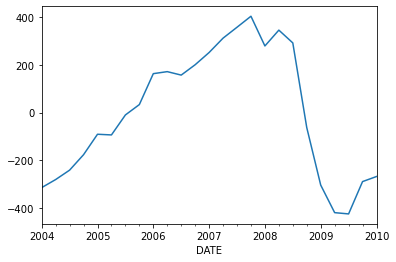

In [7]:
# Plot the GDP noise data as a line plot
ts_noise.plot()

---

### Inflation

In [8]:
# Read the Inflation csv data from FRED and set the column `DATE` as a datetime index
# Note: Inflation, as measured by consumer price index in urban areas
file_path = Path("../Resources/inflation_data.csv")
inflation = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
inflation.head()

,CPIAUCNS
DATE,
2004-01-01,185.2
2004-02-01,186.2
2004-03-01,187.4
2004-04-01,188.0
2004-05-01,189.1


<AxesSubplot:xlabel='DATE'>

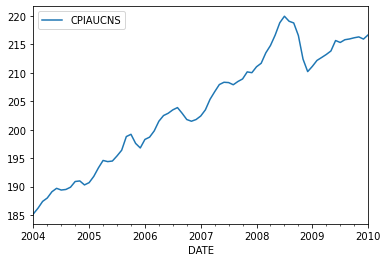

In [9]:
# Plot the raw inflation data as a line plot
inflation.plot()

In [10]:
# Use the `hpfilter` function to decompose the `CPIAUCNS` column into the trend and noise components.
inflation_noise, inflation_trend = sm.tsa.filters.hpfilter(inflation['CPIAUCNS'])

<AxesSubplot:xlabel='DATE'>

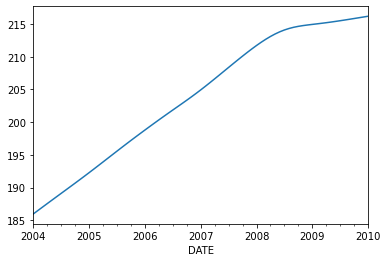

In [11]:
# Plot the inflation trend data as a line plot
inflation_trend.plot()

<AxesSubplot:xlabel='DATE'>

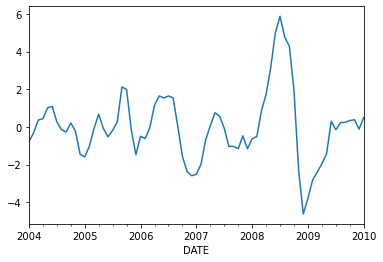

In [12]:
# Plot the inflation noise data as a line plot
inflation_noise.plot()

<AxesSubplot:xlabel='DATE'>

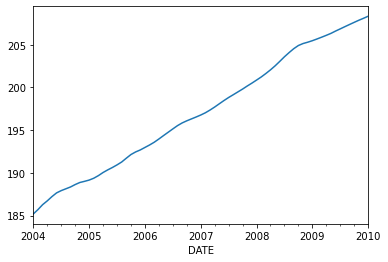

In [23]:
# Plot the exponentially-weighted moving average for the inflation data
inflation.CPIAUCNS.ewm(halflife=30).mean().plot()

---

### Job Data

In [15]:
# Read the job count csv data from FRED and set the column `DATE` as a datetime index
# Note: This is the total number of non-farm payrolls
file_path = Path("../Resources/job_roll_data.csv")
job_roll = pd.read_csv(file_path, index_col='DATE', infer_datetime_format=True, parse_dates=True)
job_roll.head()

,PAYEMS
DATE,
2004-01-01,130787
2004-02-01,130844
2004-03-01,131156
2004-04-01,131426
2004-05-01,131710


<AxesSubplot:xlabel='DATE'>

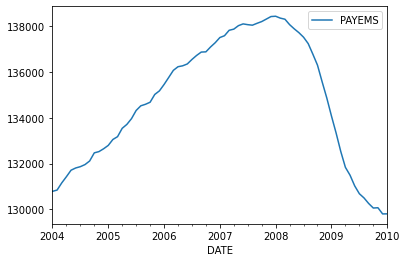

In [16]:
# Plot the raw job data as a line plot
job_roll.plot()

In [17]:
# Use the `hpfilter` function to decompose the `PAYEMS` column into the trend and noise components.
job_noise, job_trend = sm.tsa.filters.hpfilter(job_roll['PAYEMS'])

<AxesSubplot:xlabel='DATE'>

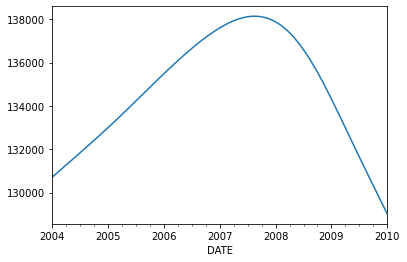

In [18]:
# Plot the job trend data as a line plot
job_trend.plot()

<AxesSubplot:xlabel='DATE'>

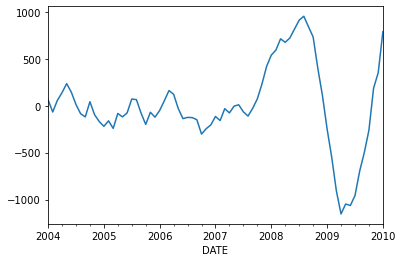

In [19]:
# Plot the job noise data as a line plot
job_noise.plot()

<AxesSubplot:xlabel='DATE'>

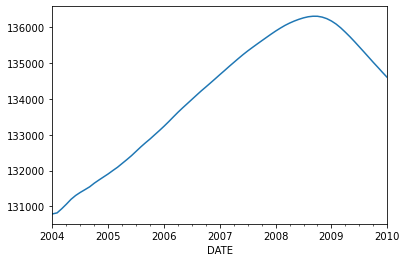

In [22]:
# Plot the exponentially-weighted moving average for the job data
job_roll.PAYEMS.ewm(halflife=30).mean().plot()